<a href="https://colab.research.google.com/github/nataliasiennicka/Air-pollution-forecast-for-Krakow-districts/blob/main/Projekt_ko%C5%84cowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Połączenie z dyskiem

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#  os.chdir('drive/MyDrive/Colab Notebooks/Projekt końcowy')

# PROBLEM -----> PROGNOZA ZANIECZYSZCZENIA POWIETRZA DLA KAŻDEJ Z DZIELNIC KRAKOWA

Obecnie jest rok 2017 (dane z kaggle). W kolejnym roku miasto Kraków chce zaofereować mieszkańcom serie letnich wydarzeń kulturalnych w plenerze (kina nocne, koncerty, plenerowe teatry, pikniki, itp.) w ramach akcji "Lato w mieście" (link do aktualnego wydarzenia: https://www.krakow.pl/201352,artykul,lato.html). 

Dużym problemem miasta jest jego zanieczyszczenie, które często przekracza normy wskaźników zanieczyszczeń ustalone przez WHO. Przy planowanych imprezach plenrowych jakość powietrza jest istotana, aby nie narażać bezpieczeństwa ludzi. Miasto planuje zorganizować ciąg wydarzeń od 01 czerwca 2018 do 31 sierpnia 2018. Problem polega na wyborze dzielnicy Krakowa, w której takie wydarzenia mogłyby się odbywać.




Dane:
  - zbiór plików csv, które dotyczą danych pogodowych :temberatura, wilgotność, ciśnienie oraz wskaźniki zanieczyszczenia

  - współrzedne kunktów czujników pomiarowych na których dane były zbierane

Dodatkowe informacje:
  - wskaźnik PM1 jest nieskalibrowany i dlatego może być większy niż PM25
  - przez pierwsze 2 miesiące wilgotność i temperatura nie były skalibrowane

#Importy

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import glob
import folium
import plotly.express as px
import plotly.graph_objs as go

#Funkcje

In [6]:
#funkcja uzupełniająca wartości tabeli wartością średnią wiersza
def refill_null_value(df):
  df_t = df.T
  for date in df_t.columns:
    df_t[date].fillna(np.mean(df_t[date]), inplace=True)
  
  df = df_t.T

#Plot do wykresów słupkowych
def plot_bocplot(df):
  fig, ax = plt.subplots(figsize=(10, 20))
  ax = sns.boxplot(data=df, orient="h")
  _ = plt.title(f"Wykres rozkładu cechy dla każdego z czujników", fontsize =16)
  _ = plt.ylabel("Sensor")
  _ = plt.show()


In [7]:
#Funkcje do zmiany nazw w listach

def rename_sensor(list, parametr):
  for i in range(len(list)):
    list[i]=list[i]+parametr

def rename_each_district_with_parametr(list_of_district,parametr1):
  for dis in list_of_district:
    rename_sensor(dis,parametr1)

def create_new_table(table, name_of_new_value): 
  table[name_of_new_value]=table.mean(axis=1) 
  table = table.loc[:,[name_of_new_value]]
  return table

#funkcja -> wszystkie dzielnice dla parametru
def change_colfor_districts(par1,table1):
  s_II = ['3', '140' ,'196' ,'201']
  s_VI = ['142' ,'170' ,'172' ,'895']
  s_XIII = ['147' ,'176' ,'227' ,'622' ,'857']
  s_XVIII = ['169', '194']
  s_III = ['171']
  s_VII = ['173' ,'174', '192', '212' ,'218']
  s_IV = ['177' ,'183', '185', '187', '205', '208' ,'209' ,'808']
  s_VIII = ['184' ,'216' ,'222' ,'225' ,'713']
  s_V = ['179', '213']
  s_XII = ['180' ,'182']
  s_I = ['181', '189', '204', '214' ,'220']
  s_XIV = ['195' ,'210', '221']
  s_X = ['202' ,'226']
  s_XVII = ['219']
  s_XV = ['215']
  s_IX = ['223' ,'228']
  s_XI = ['263']

  list_of_district = [s_II,s_VI,s_XIII,s_XVIII,s_III,s_VII,s_IV,s_VIII,s_V,s_XII,s_I,s_XIV,s_X,s_XVII,s_XV,s_IX,s_XI]

  rename_each_district_with_parametr(list_of_district,par1)

  s_II = table1.loc[:,s_II]
  s_VI = table1.loc[:,s_VI]
  s_XIII= table1.loc[:,s_XIII]
  s_XVIII = table1.loc[:,s_XVIII]
  s_III = table1.loc[:,s_III]
  s_VII = table1.loc[:,s_VII]
  s_IV = table1.loc[:,s_IV]
  s_VIII = table1.loc[:,s_VIII]
  s_V = table1.loc[:,s_V]
  s_XII = table1.loc[:,s_XII]
  s_I = table1.loc[:,s_I]
  s_XIV = table1.loc[:,s_XIV]
  s_X = table1.loc[:,s_X]
  s_XVII = table1.loc[:,s_XVII]
  s_XV = table1.loc[:,s_XV]
  s_IX = table1.loc[:,s_IX]
  s_XI = table1.loc[:,s_XI]

  s_II = create_new_table(s_II, f"s_II{par1}")
  s_VI = create_new_table(s_VI, f"s_VI{par1}")
  s_XIII= create_new_table(s_XIII, f"s_XIII{par1}")
  s_XVIII = create_new_table(s_XVIII, f"s_XVIII{par1}")
  s_III = create_new_table(s_III, f"s_III{par1}")
  s_VII = create_new_table(s_VII, f"s_VII{par1}")
  s_IV = create_new_table(s_IV, f"s_IV{par1}")
  s_VIII = create_new_table(s_VIII, f"s_VIII{par1}")
  s_V = create_new_table(s_V, f"s_V{par1}")
  s_XII = create_new_table(s_XII, f"s_XII{par1}")
  s_I = create_new_table(s_I, f"s_I{par1}")
  s_XIV = create_new_table(s_XIV, f"s_XIV{par1}")
  s_X = create_new_table(s_X, f"s_X{par1}")
  s_XVII = create_new_table(s_XVII, f"s_XVII{par1}")
  s_XV = create_new_table(s_XV, f"s_XV{par1}")
  s_IX = create_new_table(s_IX, f"s_IX{par1}")
  s_XI = create_new_table(s_XI, f"s_XI{par1}")

  s_I=pd.concat([s_I,s_II],axis=1)
  s_I=pd.concat((s_I,s_III),axis=1)
  s_I=pd.concat((s_I,s_IV),axis=1)
  s_I=pd.concat((s_I,s_V),axis=1)
  s_I=pd.concat((s_I,s_VI),axis=1)
  s_I=pd.concat((s_I,s_VII),axis=1)
  s_I=pd.concat((s_I,s_VIII),axis=1)
  s_I=pd.concat((s_I,s_IX),axis=1)
  s_I=pd.concat((s_I,s_X),axis=1)
  s_I=pd.concat((s_I,s_XI),axis=1)
  s_I=pd.concat((s_I,s_XII),axis=1)
  s_I=pd.concat((s_I,s_XIII),axis=1)
  s_I=pd.concat((s_I,s_XIV),axis=1)
  s_I=pd.concat((s_I,s_XV),axis=1)
  s_I=pd.concat((s_I,s_XVII),axis=1)
  s_I=pd.concat((s_I,s_XVIII),axis=1)
  return s_I
  

In [8]:
#Korelogram
def print_corelogram(X,size):
  plt.figure(figsize=size)
  ax = sns.heatmap(X.corr(), 
                  xticklabels=X.corr().columns, 
                  yticklabels=X.corr().columns, 
                  cmap='BuGn', 
                  center=0, 
                  annot=True)

  plt.title('Correlogram of data', fontsize=22)
  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()

In [9]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

#Wczytywanie danych

In [10]:
#wczytanie pojedynczych csv z każdego miesiąca
jan = pd.read_csv('january-2017.csv')
feb = pd.read_csv('february-2017.csv')
mar = pd.read_csv('march-2017.csv')
apr = pd.read_csv('april-2017.csv')
may = pd.read_csv('may-2017.csv')
jun = pd.read_csv('june-2017.csv')
jul = pd.read_csv('july-2017.csv')
aug = pd.read_csv('august-2017.csv')
sep = pd.read_csv('september-2017.csv')
oct = pd.read_csv('october-2017.csv')
nov = pd.read_csv('november-2017.csv')
dec = pd.read_csv('december-2017.csv')

#złączenie wszystkich tabel to jednego roku
yr_2017 = pd.concat([jan,	feb,	mar,	apr,	may,	jun,	jul,	aug,	sep,	oct,	nov,	dec])

#Wczytanie danych z lokalizacją stacji pomiarowych
sensors = pd.read_csv('sensor_locations.csv')

In [11]:
#Jakie są typy danych?
yr_2017.dtypes

UTC time          object
3_temperature    float64
3_humidity       float64
3_pressure       float64
3_pm1            float64
                  ...   
895_humidity     float64
895_pressure     float64
895_pm1          float64
895_pm25         float64
895_pm10         float64
Length: 337, dtype: object

In [12]:
# Czy są jeszcze inne typy poza floatem i object?
yr_2017.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [13]:
#Zamiana dat na typ datetime
yr_2017['UTC time'] =  pd.to_datetime(yr_2017['UTC time'])

# Analiza punktów pomiarowych

In [14]:
sensors.head(3)

,id,latitude,longitude,dzielnica
0,3,50.057748,19.961375,II
1,140,50.057747,19.961374,II
2,142,50.084816,19.878066,VI


In [15]:
sensors['name']=sensors['id']

In [16]:
sensors['name']=sensors['name'].astype(str)

In [17]:
sensors.head(3)

,id,latitude,longitude,dzielnica,name
0,3,50.057748,19.961375,II,3
1,140,50.057747,19.961374,II,140
2,142,50.084816,19.878066,VI,142


In [18]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.2 MB/s 
     |████████████████████████████████| 6.3 MB 22.7 MB/s 
     |████████████████████████████████| 16.7 MB 313 kB/s 


In [19]:
import geopandas 

In [20]:

my_map = folium.Map(
    location = [50.062006, 	19.940984], 
    width='90%', 
    height='80%',
    tiles='CartoDB Positron',
    zoom_start=11.5)

granica = f"/content/drive/MyDrive/Colab Notebooks/Projekt końcowy/shp/dzielnica.geojson"

borderStyle={
    'color':'green',
    'weight':3,
    'fillColor':'green',
    'fillOpacity' :0.05
}

folium.GeoJson(granica, name='dzielnica',
               style_function=lambda x:borderStyle).add_to(my_map)


for _, sensor in sensors.iterrows():

  folium.Marker(
      location=[sensor['latitude'],sensor['longitude']],
      popup=sensor['dzielnica']
                ).add_to(my_map)

my_map

#Analiza cech

In [21]:
yr_2017.head(5)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


W związku z tym, że przez pierwsze 2 miesiące czytniki nie były skalibrowane, ze zbioru danych wyrzucono dane od 1.01.2017 do 

In [22]:
date_mask = (yr_2017['UTC time'] > '2017-02-28 23:00:00')
yr_2017 = yr_2017.loc[date_mask]

In [23]:
#Z uwagi na to, że danyc jest bardzo duża ilość, podzielone je na kategorię: temp, humi, pres, pm25, pm10, pm1 

temp_col = [col for col in yr_2017 if 'temperature' in col or col.startswith('UTC time')]
humi_col = [col for col in yr_2017 if 'humidity' in col or col.startswith('UTC time')]
pres_col = [col for col in yr_2017 if 'pressure' in col or col.startswith('UTC time')]
pm25_col = [col for col in yr_2017 if 'pm25' in col or col.startswith('UTC time')]
pm10_col = [col for col in yr_2017 if 'pm10' in col or col.startswith('UTC time')]
pm1_col = [col for col in yr_2017 if col.endswith('pm1') or col.startswith('UTC time')]

In [24]:
temp_col=yr_2017.filter(items=temp_col)
temp_col=temp_col.set_index('UTC time')
humi_col=yr_2017.filter(items=humi_col)
humi_col=humi_col.set_index('UTC time')
pres_col=yr_2017.filter(items=pres_col)
pres_col=pres_col.set_index('UTC time')
pm25_col=yr_2017.filter(items=pm25_col)
pm25_col=pm25_col.set_index('UTC time')
pm10_col=yr_2017.filter(items=pm10_col)
pm10_col=pm10_col.set_index('UTC time')
pm1_col=yr_2017.filter(items=pm1_col)
pm1_col=pm1_col.set_index('UTC time')


##Temperatura

In [25]:
temp_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   3_temperature    0 non-null      float64
 1   140_temperature  6506 non-null   float64
 2   142_temperature  712 non-null    float64
 3   147_temperature  886 non-null    float64
 4   169_temperature  6958 non-null   float64
 5   170_temperature  7044 non-null   float64
 6   171_temperature  7105 non-null   float64
 7   172_temperature  1596 non-null   float64
 8   173_temperature  6985 non-null   float64
 9   174_temperature  5975 non-null   float64
 10  176_temperature  7129 non-null   float64
 11  177_temperature  6391 non-null   float64
 12  178_temperature  1302 non-null   float64
 13  179_temperature  7120 non-null   float64
 14  180_temperature  7169 non-null   float64
 15  181_temperature  7139 non-null   float64
 16  182_temperature  6144 no

Powyżej widać, że istnieje dużo brakujących danych

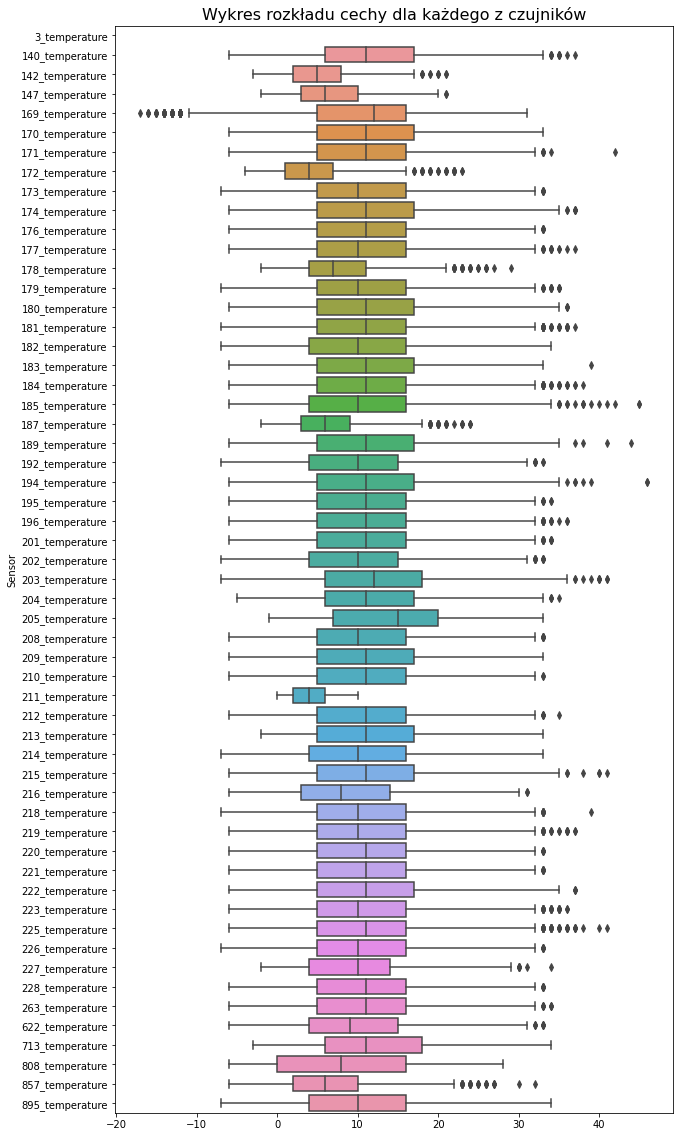

In [26]:
plot_bocplot(temp_col)

In [27]:
refill_null_value(temp_col)


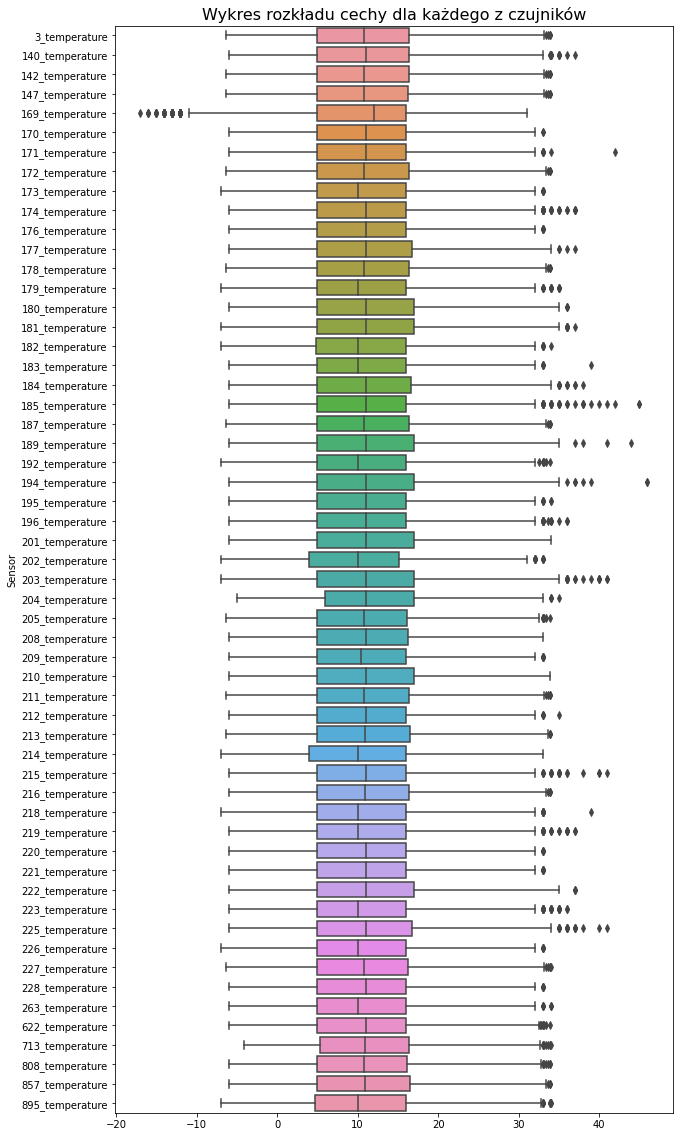

In [28]:
plot_bocplot(temp_col)

Na wykresie natomiast widać, że temperatura dla każdego z sensorów ma podobny rozkład, co osnacza, że nie ma "grubych" błędów w pomiarach, istnieją natomiast wartości nullowe, które należałoby uzupełnić

##Wilgotność

In [29]:
humi_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   3_humidity    0 non-null      float64
 1   140_humidity  6506 non-null   float64
 2   142_humidity  712 non-null    float64
 3   147_humidity  886 non-null    float64
 4   169_humidity  6958 non-null   float64
 5   170_humidity  7044 non-null   float64
 6   171_humidity  7105 non-null   float64
 7   172_humidity  1596 non-null   float64
 8   173_humidity  6985 non-null   float64
 9   174_humidity  5975 non-null   float64
 10  176_humidity  7129 non-null   float64
 11  177_humidity  6391 non-null   float64
 12  178_humidity  1302 non-null   float64
 13  179_humidity  7120 non-null   float64
 14  180_humidity  7169 non-null   float64
 15  181_humidity  7139 non-null   float64
 16  182_humidity  6144 non-null   float64
 17  183_humidity  6708 non-null   float

Tutaj również występują braki w danych, spójrzmy jak wygląda zakres wartości na każdym sensorze:

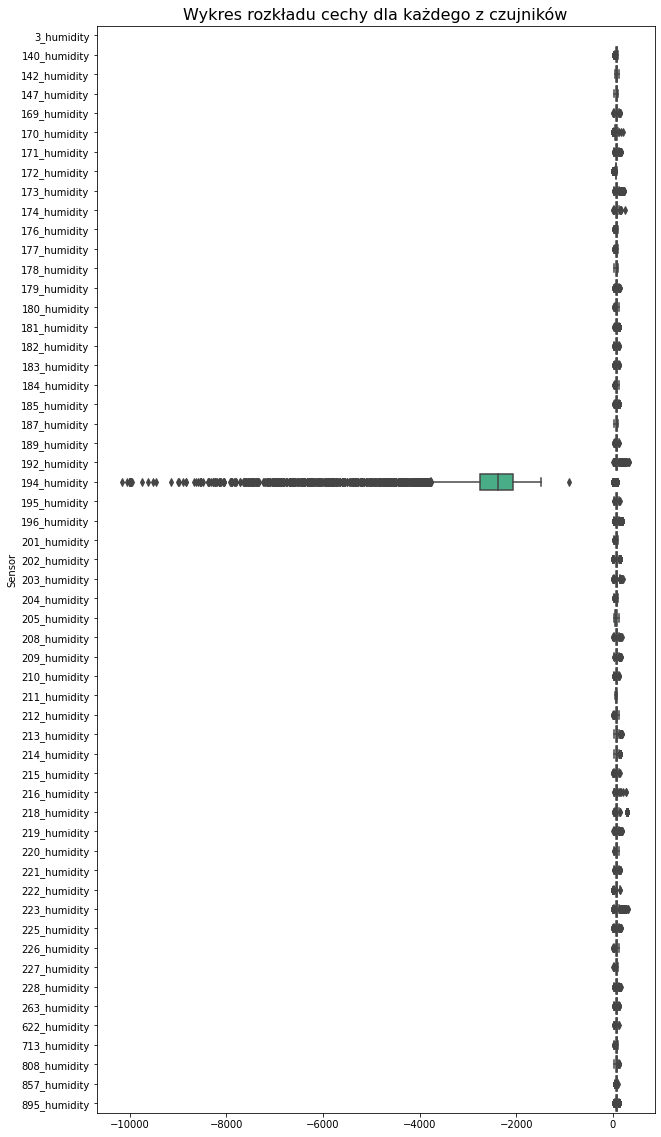

In [30]:
plot_bocplot(humi_col)

Na przykładzie wykresu widać, że znaczący wpływ na dane mają występujące błędy dla sensora 194.

Sprawdzono jak dane wyglądają bez uwzdlędnienia tego sensora:


In [31]:
humi_col_without_194 = humi_col.drop(columns="194_humidity")
min_194 = min(humi_col["194_humidity"])
max_194 = max(humi_col["194_humidity"])

In [32]:
print(f"Maksymalna wartość wilgotności dla sensora 194: {max_194}")
print(f"Minimalna wartość wilgotności dla sensora 194: {min_194}")
print()
print(f"Maksymalna wartość wilgotności bez sensora 194: {humi_col_without_194.max().max()}")
print(f"Minimalna wartość wilgotności bez sensora 194: {humi_col_without_194.min().min()}")

Maksymalna wartość wilgotności dla sensora 194: 94.0
Minimalna wartość wilgotności dla sensora 194: -10157.0

Maksymalna wartość wilgotności bez sensora 194: 337.0
Minimalna wartość wilgotności bez sensora 194: 1.0


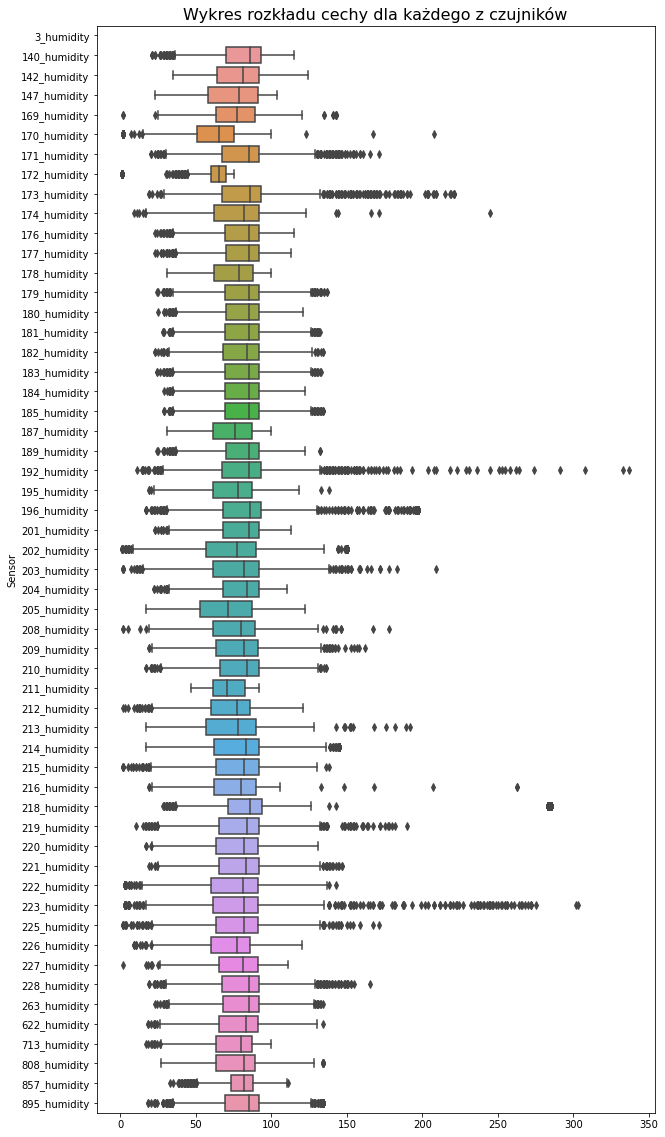

In [33]:
plot_bocplot(humi_col_without_194)

Można zauważyć, że wartości wilgotności powietrza są nieprawidłow, ponieważ zakres wskażnika wyrażony jest w procentach, więc od 0% do 100%. Zastosowano odseparowanie tych wartości i ich zamiana na wartości Nullowe, które w kolejnym kroku, podobnie jak w przypadku temperatury zostaną zastąpione wartościami średnimi dla poszczególnych dni.

In [34]:
list_of_sensors = ['3_humidity', '140_humidity', '142_humidity', '147_humidity',
       '169_humidity', '170_humidity', '171_humidity', '172_humidity',
       '173_humidity', '174_humidity', '176_humidity', '177_humidity',
       '179_humidity', '180_humidity', '181_humidity', '182_humidity',
       '183_humidity', '184_humidity', '185_humidity', '187_humidity',
       '189_humidity', '192_humidity', '194_humidity', '195_humidity',
       '196_humidity', '201_humidity', '202_humidity', '204_humidity',
       '205_humidity', '208_humidity', '209_humidity', '210_humidity',
       '212_humidity', '213_humidity', '214_humidity', '215_humidity',
       '216_humidity', '218_humidity', '219_humidity', '220_humidity',
       '221_humidity', '222_humidity', '223_humidity', '225_humidity',
       '226_humidity', '227_humidity', '228_humidity', '263_humidity',
       '622_humidity', '713_humidity', '808_humidity', '857_humidity',
       '895_humidity']

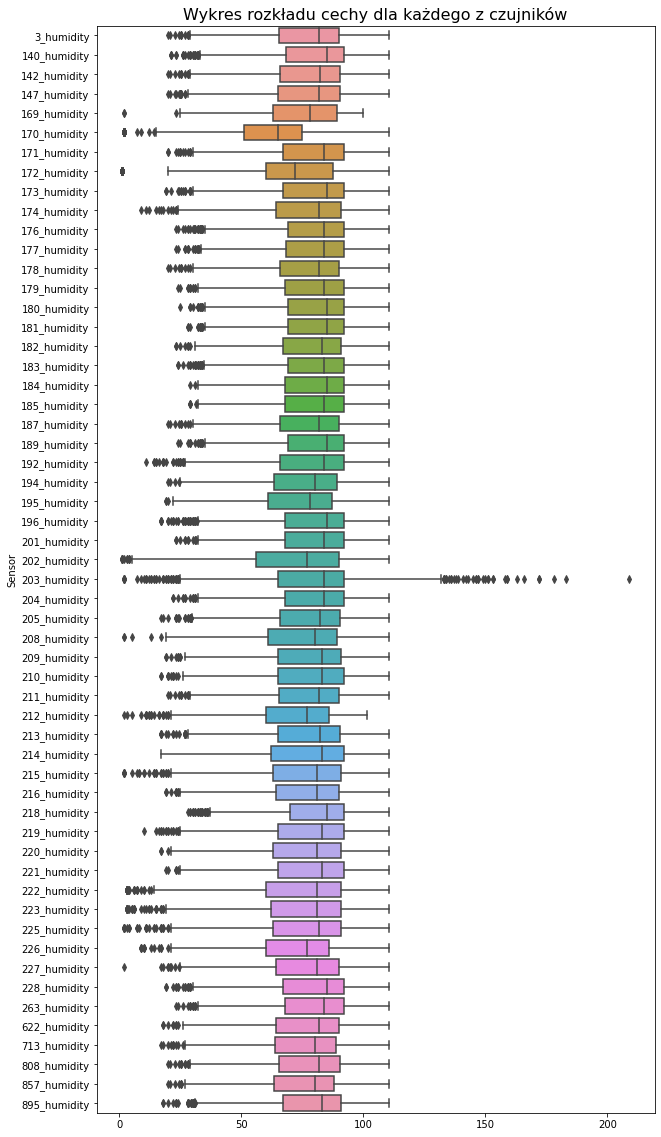

In [35]:
#Wyrzucenie wartości spoza zakresu dla sensora 194
humi_col.loc[humi_col["194_humidity"]<=0,["194_humidity"]] = np.NaN

for sensor in list_of_sensors:
  humi_col.loc[humi_col[sensor]>100,[sensor]] = np.NaN
  
#Zastępienie wartości nullowych dla całej tablicy
refill_null_value(humi_col)

plot_bocplot(humi_col)

##Ciśnienie

In [36]:
pres_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   3_pressure    229 non-null    float64
 1   140_pressure  6683 non-null   float64
 2   142_pressure  712 non-null    float64
 3   147_pressure  6550 non-null   float64
 4   169_pressure  6958 non-null   float64
 5   170_pressure  7044 non-null   float64
 6   171_pressure  7105 non-null   float64
 7   172_pressure  6984 non-null   float64
 8   173_pressure  7083 non-null   float64
 9   174_pressure  5975 non-null   float64
 10  176_pressure  1739 non-null   float64
 11  177_pressure  5548 non-null   float64
 12  178_pressure  0 non-null      float64
 13  179_pressure  1573 non-null   float64
 14  180_pressure  1738 non-null   float64
 15  181_pressure  1734 non-null   float64
 16  182_pressure  1701 non-null   float64
 17  183_pressure  954 non-null    float

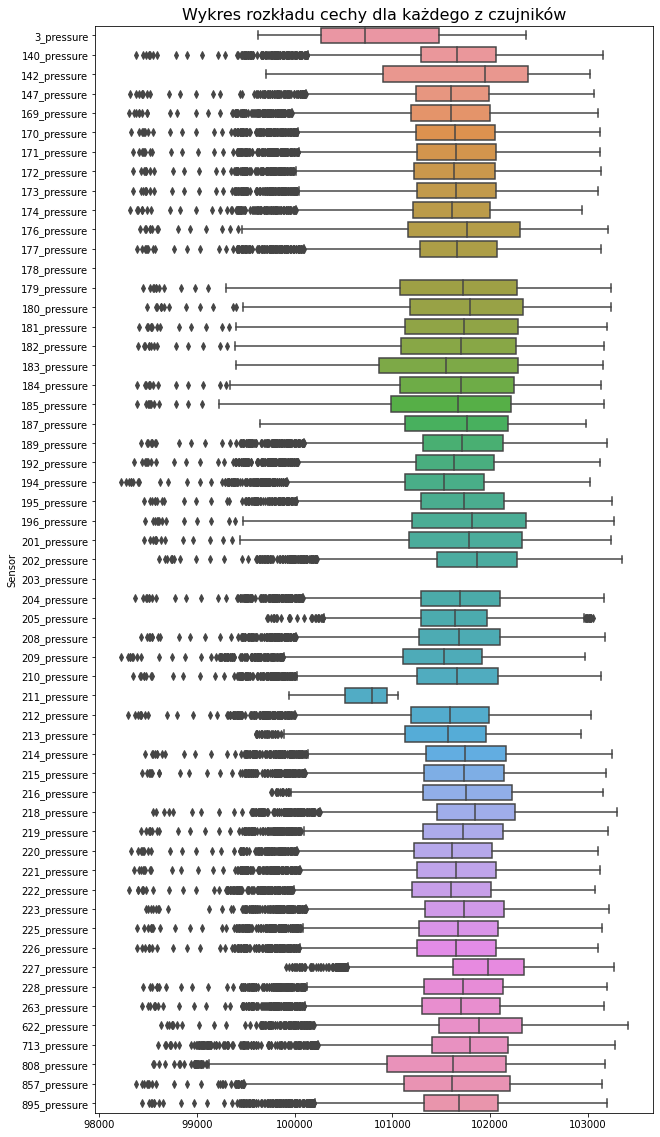

In [37]:
plot_bocplot(pres_col)

Zakres danych z każdego sensora jest zbliżony, ne występują więc błędy pomiarach, jadnak dla dwóch sensorów jest brak danych :203 oraz 178.


In [38]:
sensors.loc[(sensors['id']==203), :]

,id,latitude,longitude,dzielnica,name
28,203,50.083454,20.057153,XVII,203


In [39]:
sensors.loc[(sensors['id']==178), :]

,id,latitude,longitude,dzielnica,name
12,178,50.033195,19.900714,VIII,178


In [40]:
sensors.loc[(sensors['dzielnica']=='XVII'), :]

,id,latitude,longitude,dzielnica,name
28,203,50.083454,20.057153,XVII,203
41,219,50.107347,20.045773,XVII,219


In [41]:
sensors.loc[(sensors['dzielnica']=='VIII'), :]

,id,latitude,longitude,dzielnica,name
12,178,50.033195,19.900714,VIII,178
18,184,50.047736,19.919646,VIII,184
39,216,50.043527,19.925963,VIII,216
44,222,50.040717,19.869575,VIII,222
46,225,50.020756,19.844076,VIII,225
52,713,50.032902,19.900930,VIII,713


Zarówno w przypadku sensora 203 jak i 178 w dzielnicach w których są zlokalizowane, znajdują się inne czujniki. Zdecydowano, że pomiary z tych stanowisk zostaną odrzucone. Wartości Nullowe zostaną zastąpione wartościami średnimi

In [42]:
pres_col.drop(columns=['178_pressure','203_pressure'],inplace=True)
humi_col.drop(columns=['178_humidity','203_humidity'],inplace=True)
temp_col.drop(columns=['178_temperature','203_temperature'],inplace=True)
pm25_col.drop(columns=['178_pm25','203_pm25'],inplace=True)
pm10_col.drop(columns=['178_pm10','203_pm10'],inplace=True)
pm1_col.drop(columns=['178_pm1','203_pm1'],inplace=True)
sensors.drop([12,28],axis=0,inplace=True)

In [43]:
refill_null_value(pres_col)
pres_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   3_pressure    7177 non-null   float64
 1   140_pressure  7177 non-null   float64
 2   142_pressure  7177 non-null   float64
 3   147_pressure  7177 non-null   float64
 4   169_pressure  7177 non-null   float64
 5   170_pressure  7177 non-null   float64
 6   171_pressure  7177 non-null   float64
 7   172_pressure  7177 non-null   float64
 8   173_pressure  7177 non-null   float64
 9   174_pressure  7177 non-null   float64
 10  176_pressure  7177 non-null   float64
 11  177_pressure  7177 non-null   float64
 12  179_pressure  7177 non-null   float64
 13  180_pressure  7177 non-null   float64
 14  181_pressure  7177 non-null   float64
 15  182_pressure  7177 non-null   float64
 16  183_pressure  7177 non-null   float64
 17  184_pressure  7177 non-null   float

##Wskaźniki P25, P10, P1

In [44]:
pm25_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3_pm25    229 non-null    float64
 1   140_pm25  6631 non-null   float64
 2   142_pm25  712 non-null    float64
 3   147_pm25  6550 non-null   float64
 4   169_pm25  6958 non-null   float64
 5   170_pm25  7044 non-null   float64
 6   171_pm25  7105 non-null   float64
 7   172_pm25  6984 non-null   float64
 8   173_pm25  7083 non-null   float64
 9   174_pm25  5975 non-null   float64
 10  176_pm25  7129 non-null   float64
 11  177_pm25  6391 non-null   float64
 12  179_pm25  7120 non-null   float64
 13  180_pm25  7169 non-null   float64
 14  181_pm25  7139 non-null   float64
 15  182_pm25  6150 non-null   float64
 16  183_pm25  6712 non-null   float64
 17  184_pm25  6974 non-null   float64
 18  185_pm25  6508 non-null   float64
 19  187_pm25  1075 non-null   float64

In [45]:
pm10_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3_pm10    229 non-null    float64
 1   140_pm10  6631 non-null   float64
 2   142_pm10  712 non-null    float64
 3   147_pm10  6550 non-null   float64
 4   169_pm10  6958 non-null   float64
 5   170_pm10  7044 non-null   float64
 6   171_pm10  7105 non-null   float64
 7   172_pm10  6984 non-null   float64
 8   173_pm10  7083 non-null   float64
 9   174_pm10  5975 non-null   float64
 10  176_pm10  7129 non-null   float64
 11  177_pm10  6391 non-null   float64
 12  179_pm10  7120 non-null   float64
 13  180_pm10  7169 non-null   float64
 14  181_pm10  7139 non-null   float64
 15  182_pm10  6150 non-null   float64
 16  183_pm10  6712 non-null   float64
 17  184_pm10  6974 non-null   float64
 18  185_pm10  6508 non-null   float64
 19  187_pm10  1075 non-null   float64

In [46]:
pm1_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   3_pm1    229 non-null    float64
 1   140_pm1  6631 non-null   float64
 2   142_pm1  712 non-null    float64
 3   147_pm1  6550 non-null   float64
 4   169_pm1  6957 non-null   float64
 5   170_pm1  7044 non-null   float64
 6   171_pm1  7105 non-null   float64
 7   172_pm1  6984 non-null   float64
 8   173_pm1  7083 non-null   float64
 9   174_pm1  5975 non-null   float64
 10  176_pm1  7129 non-null   float64
 11  177_pm1  6391 non-null   float64
 12  179_pm1  7120 non-null   float64
 13  180_pm1  7169 non-null   float64
 14  181_pm1  7139 non-null   float64
 15  182_pm1  6150 non-null   float64
 16  183_pm1  6712 non-null   float64
 17  184_pm1  6974 non-null   float64
 18  185_pm1  6508 non-null   float64
 19  187_pm1  1075 non-null   float64
 20  189_pm1  7083 no

Widać, że dla sensora 211, jest znacząco mniej danych


In [47]:
sensors.loc[(sensors['id']==211), :]

,id,latitude,longitude,dzielnica,name
34,211,50.044424,19.952205,XIII,211


In [48]:
sensors.loc[(sensors['dzielnica']=='XIII'), :]

,id,latitude,longitude,dzielnica,name
3,147,50.048924,19.962262,XIII,147
10,176,50.044067,19.998804,XIII,176
34,211,50.044424,19.952205,XIII,211
48,227,50.037680,19.990546,XIII,227
51,622,50.044418,19.952200,XIII,622
54,857,50.037663,19.990601,XIII,857


Ponieważ w dzielnicy znajduje się więcej sensorów, ten sensor również odrzucamy w analizie natomiast resztę brakujących wartości zastępujemy, średnią wartością z dnia

In [49]:
#Wyrzucenie sensora 211 z danych
pres_col.drop(columns=['211_pressure'],inplace=True)
humi_col.drop(columns=['211_humidity'],inplace=True)
temp_col.drop(columns=['211_temperature'],inplace=True)
pm25_col.drop(columns=['211_pm25'],inplace=True)
pm10_col.drop(columns=['211_pm10'],inplace=True)
pm1_col.drop(columns=['211_pm1'],inplace=True)
sensors.drop([34],axis=0,inplace=True)

In [50]:
refill_null_value(pm25_col)
refill_null_value(pm10_col)
refill_null_value(pm1_col)

### Czym są wskaniki P?

Wskaźniki te mówią o wielkości cząsteczek pyłów zawieszonych w powietrzu. Im ich średnica jest mniejsza tym gorzej, ponieważ łatwiej przenikają do organizmów.

**PM2.5**  to aerozole atmosferyczne, których średnica nie jest większa niż 2.5 mikrometra. 
**PM10** to pył zawieszony o średnicy 10 mikrometrów, który przede wszystkim wpływa negatywnie na układ oddechowy.
**PM1** to pył zawieszony o średnicy 1 mikrometra, najbardziej niebezbieczny dla człowieka

Pyły posiadają odpowiednie normy ustalone prze WHO:
 - **50 µg/m3** dla **PM10**
 - **25 µg/m3** dla **PM2.5**
 - **brak µg/m3** dla **PM1**

W Polsce Główny Inspektorat Ochrony Środowiska przyjmuje wartości, po przekroczeniu których stosuje odpowiednie alarmy

Dla PM10
- 50 µg/m3 – poziom dopuszczalny,
- 200 µg/m3 – poziom informowania,
- 300 µg/m3 – poziom alarmowy.

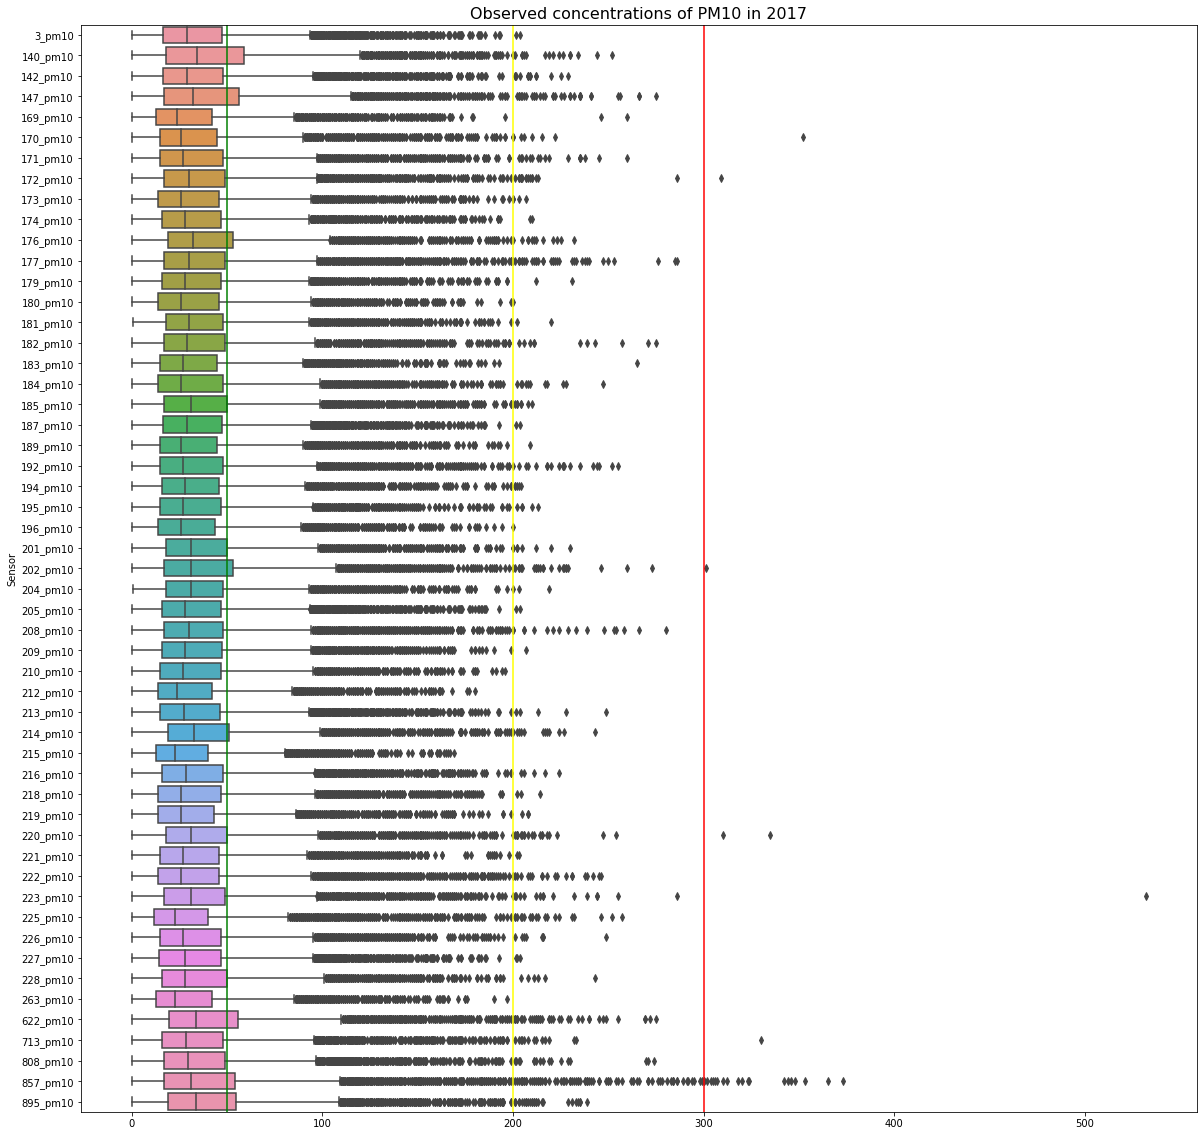

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=pm10_col, orient="h")
_ = plt.title("Observed concentrations of PM10 in 2017", fontsize=16)
_ = plt.axvline(50, color="green")
_ = plt.axvline(200, color="yellow")
_ = plt.axvline(300, color="red")
_ = plt.ylabel("Sensor")
_ = plt.show()

W związku z tym, że W Polsce wskaźnik P10 jest najbardziej istotnym to włąsnie ta wartość jest targetem to przewidzenia w 2018 roku.

##Zaagregowanie danych do dzielnic

W związku z tym, że alalizę wykonujemy prognozując zanieczyszczenie powietrza dla konkretnej dzielnicy, dane zagregowano wyciągając średnią wartość z sensorów należących do poszczególnych dzielnic

In [52]:
# tabele parametrów, w których dla parametru jest każda dzielnica
temp_col_dist = change_colfor_districts('_temperature',temp_col)
pres_col_dist = change_colfor_districts('_pressure',pres_col)
humi_col_dist = change_colfor_districts('_humidity',humi_col)
pm25_col_dist = change_colfor_districts('_pm25',pm25_col)
pm10_col_dist = change_colfor_districts('_pm10',pm10_col)
pm1_col_dist = change_colfor_districts('_pm1',pm1_col)

Warto przyjrzeć się zatem jak rozkłada się wysokość wskaźnika p10 dla poszczególnych dzelnic w ciągu roku

In [53]:
pm10_col_dist.round(2)

,s_I_pm10,s_II_pm10,s_III_pm10,s_IV_pm10,s_V_pm10,s_VI_pm10,s_VII_pm10,s_VIII_pm10,s_IX_pm10,s_X_pm10,s_XI_pm10,s_XII_pm10,s_XIII_pm10,s_XIV_pm10,s_XV_pm10,s_XVII_pm10,s_XVIII_pm10
UTC time,,,,,,,,,,,,,,,,,
2017-03-01 00:00:00,7.80,8.15,13.0,8.78,9.00,7.15,8.00,5.92,21.0,5.5,5.0,3.0,7.04,4.67,6.0,6.0,3.50
2017-03-01 01:00:00,4.60,5.23,6.0,3.23,3.50,2.23,2.00,3.38,11.5,4.0,5.0,2.0,4.77,5.67,3.0,2.0,1.50
2017-03-01 02:00:00,6.80,8.80,7.0,6.92,7.00,8.05,8.20,8.84,6.5,7.5,7.0,4.0,7.68,7.00,5.0,4.0,3.50
2017-03-01 03:00:00,8.40,10.59,12.0,10.71,10.00,10.84,9.60,7.87,7.5,8.5,4.0,8.0,9.34,10.00,9.0,9.0,8.00
2017-03-01 04:00:00,5.40,7.40,8.0,8.52,5.50,7.90,6.60,5.72,4.5,5.5,3.0,5.5,6.83,6.67,6.0,7.0,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24 20:00:00,20.54,21.67,24.0,27.17,24.84,23.17,22.14,21.27,20.0,19.5,15.0,19.0,26.27,21.00,20.0,21.0,22.34
2017-12-24 21:00:00,18.97,20.21,21.0,23.09,23.93,20.46,20.37,19.94,19.5,20.5,15.0,20.0,24.14,19.33,18.0,20.0,20.43
2017-12-24 22:00:00,15.80,17.49,19.0,20.62,19.99,18.24,17.20,16.99,16.5,17.5,12.0,16.0,20.79,16.67,16.0,18.0,17.99


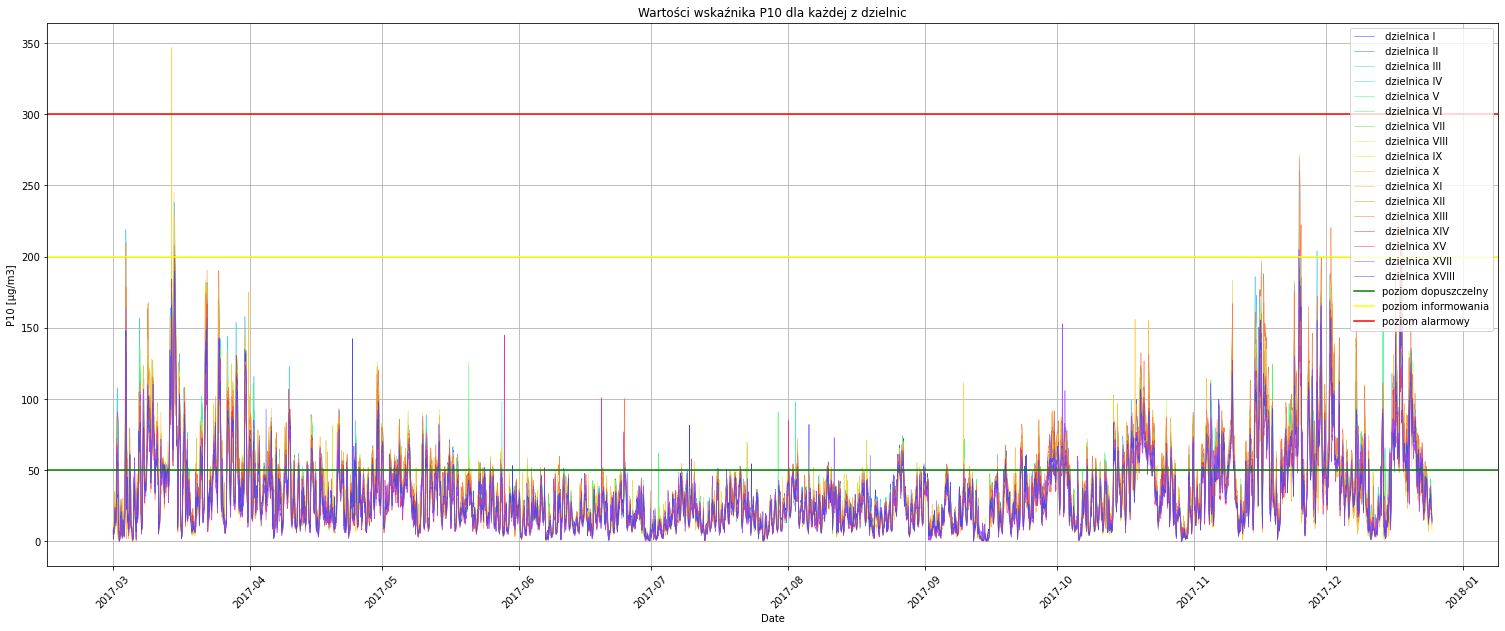

In [54]:
plt.figure(figsize=(26,10))

plt.plot(pm10_col_dist.index,pm10_col_dist['s_I_pm10'],color = '#373FFF',linewidth=0.5, label=" dzielnica I")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_II_pm10'],color = '#3979E3',linewidth=0.5, label=" dzielnica II")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_III_pm10'],color = '#4BC8FA',linewidth=0.5, label=" dzielnica III")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_IV_pm10'],color = '#39E3D8',linewidth=0.5, label=" dzielnica IV")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_V_pm10'],color = '#3FFBAA',linewidth=0.5, label=" dzielnica V")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_VI_pm10'],color = '#47FF6E',linewidth=0.5, label=" dzielnica VI")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_VII_pm10'],color = '#65E346',linewidth=0.5, label=" dzielnica VII")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_VIII_pm10'],color = '#C2FA5A',linewidth=0.5, label=" dzielnica VIII")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_IX_pm10'],color = '#E3DE46',linewidth=0.5, label=" dzielnica IX")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_X_pm10'],color = '#E6C54B',linewidth=0.5, label=" dzielnica X")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XI_pm10'],color = '#FFC533',linewidth=0.5, label=" dzielnica XI")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XII_pm10'],color = '#E39434',linewidth=0.5, label=" dzielnica XII")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XIII_pm10'],color = '#FA7F47',linewidth=0.5, label=" dzielnica XIII")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XIV_pm10'],color = '#E34334',linewidth=0.5, label=" dzielnica XIV")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XV_pm10'],color = '#E6398E',linewidth=0.5, label=" dzielnica XV")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XVII_pm10'],color = '#9F4DFF',linewidth=0.5, label=" dzielnica XVII")
plt.plot(pm10_col_dist.index,pm10_col_dist['s_XVIII_pm10'],color = '#504BE3',linewidth=0.5, label=" dzielnica XVIII")

plt.axhline(50, label = 'poziom dopuszczelny', color="green")
plt.axhline(200, label = 'poziom informowania', color="yellow")
plt.axhline(300, label = 'poziom alarmowy', color="red")

#title
plt.title('Wartości wskaźnika P10 dla każdej z dzielnic')

#grid
plt.grid()

#labels
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('P10 [µg/m3]')

plt.legend(loc="upper right")

plt.show()

Analizując okres, który jest najbardziej istotny pod względem planowanego wydarzenia, można dostrzec, że niektóre z dzielnic mają wskaźnik P10 ponad normą. Czas na który planowane są wydarzenia plenerowe odbywanie od czerwca do września. Sprawdźmy więc jak wygląda rozłożenie wskaźnika bezpośrednio dla tego przedziału czasowego

In [55]:
#Ustawienie indexu
list(yr_2017['UTC time'])
pm10_col_dist['Date']=list(yr_2017['UTC time'])

#Ustawienie okna czasowego

date_mask2 = (pm10_col_dist['Date'] > '2017-05-31 23:00:00')&(pm10_col_dist['Date'] < '2017-09-01 00:00:00')
pm10_col_dist_perioid = pm10_col_dist.loc[date_mask2]


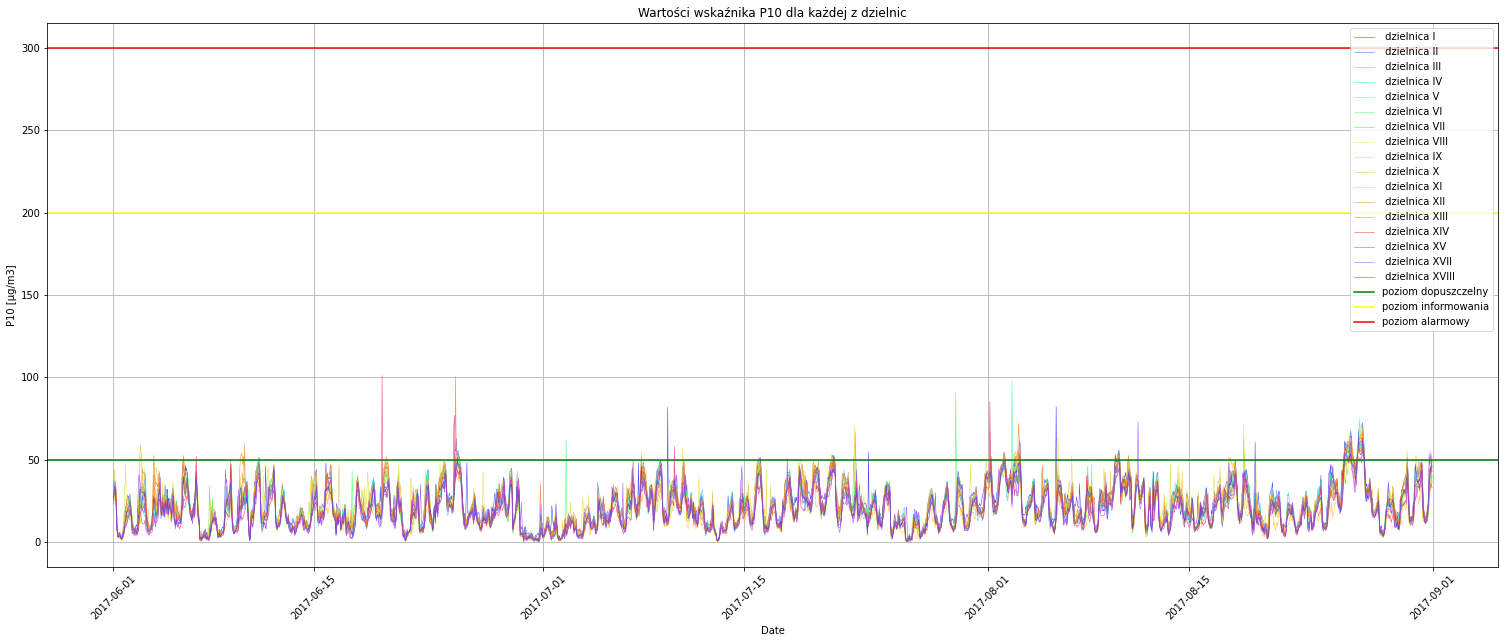

In [56]:
plt.figure(figsize=(26,10))

plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_I_pm10'],color = '#373FFF',linewidth=0.5, label=" dzielnica I")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_II_pm10'],color = '#3979E3',linewidth=0.5, label=" dzielnica II")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_III_pm10'],color = '#4BC8FA',linewidth=0.5, label=" dzielnica III")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_IV_pm10'],color = '#39E3D8',linewidth=0.5, label=" dzielnica IV")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_V_pm10'],color = '#3FFBAA',linewidth=0.5, label=" dzielnica V")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_VI_pm10'],color = '#47FF6E',linewidth=0.5, label=" dzielnica VI")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_VII_pm10'],color = '#65E346',linewidth=0.5, label=" dzielnica VII")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_VIII_pm10'],color = '#C2FA5A',linewidth=0.5, label=" dzielnica VIII")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_IX_pm10'],color = '#E3DE46',linewidth=0.5, label=" dzielnica IX")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_X_pm10'],color = '#E6C54B',linewidth=0.5, label=" dzielnica X")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XI_pm10'],color = '#FFC533',linewidth=0.5, label=" dzielnica XI")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XII_pm10'],color = '#E39434',linewidth=0.5, label=" dzielnica XII")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XIII_pm10'],color = '#FA7F47',linewidth=0.5, label=" dzielnica XIII")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XIV_pm10'],color = '#E34334',linewidth=0.5, label=" dzielnica XIV")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XV_pm10'],color = '#E6398E',linewidth=0.5, label=" dzielnica XV")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XVII_pm10'],color = '#9F4DFF',linewidth=0.5, label=" dzielnica XVII")
plt.plot(pm10_col_dist_perioid.index,pm10_col_dist_perioid['s_XVIII_pm10'],color = '#504BE3',linewidth=0.5, label=" dzielnica XVIII")

plt.axhline(50, label = 'poziom dopuszczelny', color="green")
plt.axhline(200, label = 'poziom informowania', color="yellow")
plt.axhline(300, label = 'poziom alarmowy', color="red")

#title
plt.title('Wartości wskaźnika P10 dla każdej z dzielnic')

#grid
plt.grid()

#labels
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('P10 [µg/m3]')

plt.legend(loc="upper right")

plt.show()

Na wykresie można zauważyć, że w niektórych dzielnicach wastość P10 jest znacznie powyżej normy (np. dla dzielnicy IV, V i XV, natomiast niektóra utrzynują stan poniżej normy, bądź ich przekroczenia są mniejsze (np. dzielnice XII i XVII). W miesiącach letnich wartość wskaźnika nigdy nie przekroczyła poziomu alarmowego oraz informowania, co oznacza, że miesiące te są najkorzystniejszym wyborem do zaplanowania wydarzeń na powierzu, ponieważ szansa na wskaźnik przekraczający poziom informowania jest niewielki.

In [57]:
#Usunięcie wcześniej zbędnie utworzonej kolumny
# pm10_col_dist = pm10_col_dist.drop(['Date'], axis=1)

#Stworzenie nowej tabeli z danymi usupełnionymi dla dzielnic
year_2017_districts = temp_col_dist.copy()
year_2017_districts = pd.concat((year_2017_districts,humi_col_dist),axis=1)
year_2017_districts = pd.concat((year_2017_districts,pres_col_dist),axis=1)
year_2017_districts = pd.concat((year_2017_districts,pm1_col_dist),axis=1)
year_2017_districts = pd.concat((year_2017_districts,pm25_col_dist),axis=1)
year_2017_districts = pd.concat((year_2017_districts,pm10_col_dist),axis=1)

In [58]:
#Tabele z dzielnicami, w których dla każdej dzielnicy są jej parametry

dzielnica_I = [col for col in year_2017_districts if 's_I_' in col or col.startswith('UTC time')]
dzielnica_I=year_2017_districts.filter(items=dzielnica_I)
dzielnica_II = [col for col in year_2017_districts if 's_II_' in col or col.startswith('UTC time')]
dzielnica_II=year_2017_districts.filter(items=dzielnica_II)
dzielnica_III = [col for col in year_2017_districts if 's_III_' in col or col.startswith('UTC time')]
dzielnica_III=year_2017_districts.filter(items=dzielnica_III)
dzielnica_IV = [col for col in year_2017_districts if 's_IV_' in col or col.startswith('UTC time')]
dzielnica_IV=year_2017_districts.filter(items=dzielnica_IV)
dzielnica_V = [col for col in year_2017_districts if 's_V_' in col or col.startswith('UTC time')]
dzielnica_V=year_2017_districts.filter(items=dzielnica_V)
dzielnica_VI = [col for col in year_2017_districts if 's_VI_' in col or col.startswith('UTC time')]
dzielnica_VI=year_2017_districts.filter(items=dzielnica_VI)
dzielnica_VII = [col for col in year_2017_districts if 's_VII_' in col or col.startswith('UTC time')]
dzielnica_VI=year_2017_districts.filter(items=dzielnica_VII)
dzielnica_VIII = [col for col in year_2017_districts if 's_VIII_' in col or col.startswith('UTC time')]
dzielnica_VIII=year_2017_districts.filter(items=dzielnica_VIII)
dzielnica_IX = [col for col in year_2017_districts if 's_IX_' in col or col.startswith('UTC time')]
dzielnica_IX=year_2017_districts.filter(items=dzielnica_IX)
dzielnica_X = [col for col in year_2017_districts if 's_X_' in col or col.startswith('UTC time')]
dzielnica_X=year_2017_districts.filter(items=dzielnica_X)
dzielnica_XI = [col for col in year_2017_districts if 's_XI_' in col or col.startswith('UTC time')]
dzielnica_XI=year_2017_districts.filter(items=dzielnica_XI)
dzielnica_XII = [col for col in year_2017_districts if 's_XII_' in col or col.startswith('UTC time')]
dzielnica_XII=year_2017_districts.filter(items=dzielnica_XII)
dzielnica_XIII = [col for col in year_2017_districts if 's_XIII_' in col or col.startswith('UTC time')]
dzielnica_XIII=year_2017_districts.filter(items=dzielnica_XIII)
dzielnica_XIV = [col for col in year_2017_districts if 's_XIV_' in col or col.startswith('UTC time')]
dzielnica_XIV=year_2017_districts.filter(items=dzielnica_XIV)
dzielnica_XV = [col for col in year_2017_districts if 's_XV_' in col or col.startswith('UTC time')]
dzielnica_XV=year_2017_districts.filter(items=dzielnica_XV)
dzielnica_XVII = [col for col in year_2017_districts if 's_XVII_' in col or col.startswith('UTC time')]
dzielnica_XVII=year_2017_districts.filter(items=dzielnica_XVII)
dzielnica_XVIII = [col for col in year_2017_districts if 's_XVIII_' in col or col.startswith('UTC time')]
dzielnica_XVIII=year_2017_districts.filter(items=dzielnica_XVIII)

In [59]:
dzielnica_XVII

,s_XVII_temperature,s_XVII_humidity,s_XVII_pressure,s_XVII_pm1,s_XVII_pm25,s_XVII_pm10
UTC time,,,,,,
2017-03-01 00:00:00,10.0,56.0,99907.0,5.0,0.0,6.0
2017-03-01 01:00:00,10.0,55.0,99888.0,3.0,0.0,2.0
2017-03-01 02:00:00,8.0,71.0,99931.0,4.0,0.0,4.0
2017-03-01 03:00:00,5.0,88.0,100095.0,8.0,2.0,9.0
2017-03-01 04:00:00,5.0,87.0,100200.0,6.0,0.0,7.0
...,...,...,...,...,...,...
2017-12-24 20:00:00,6.0,88.0,101764.0,12.0,13.0,21.0
2017-12-24 21:00:00,5.0,88.0,101798.0,11.0,12.0,20.0
2017-12-24 22:00:00,5.0,85.0,101813.0,10.0,11.0,18.0


#Korelacje czynników

In [60]:
#Stworzenie grup parametrów do określenia korelacji

temp_col = [col for col in yr_2017 if 'temperature' in col or col.startswith('UTC time')]
humi_col = [col for col in yr_2017 if 'humidity' in col or col.startswith('UTC time')]
pres_col = [col for col in yr_2017 if 'pressure' in col or col.startswith('UTC time')]
pm25_col = [col for col in yr_2017 if 'pm25' in col or col.startswith('UTC time')]
pm10_col = [col for col in yr_2017 if 'pm10' in col or col.startswith('UTC time')]
pm1_col = [col for col in yr_2017 if col.endswith('pm1') or col.startswith('UTC time')]

melt_temp = pd.melt(yr_2017[temp_col], id_vars="UTC time",var_name="Temp_sensor_id", value_name='Temperature')
melt_humi = pd.melt(yr_2017[humi_col],id_vars="UTC time", var_name="Humi_sensor_id", value_name='Humidity')
melt_pres = pd.melt(yr_2017[pres_col], id_vars="UTC time",var_name="Pres_sensor_id", value_name='Pressure')
melt_pm25 = pd.melt(yr_2017[pm25_col], id_vars="UTC time",var_name="pm25_sensor_id", value_name='pm25')
melt_pm10 = pd.melt(yr_2017[pm10_col], id_vars="UTC time",var_name="pm10_sensor_id", value_name='pm10')
melt_pm1 = pd.melt(yr_2017[pm1_col], id_vars="UTC time",var_name="pm1_sensor_id", value_name='pm1')

year_melted = pd.concat([melt_temp, melt_humi.iloc[:,1:], melt_pres.iloc[:,1:],  melt_pm25.iloc[:,1:], melt_pm10.iloc[:,1:], melt_pm1.iloc[:,1:] ], axis=1)

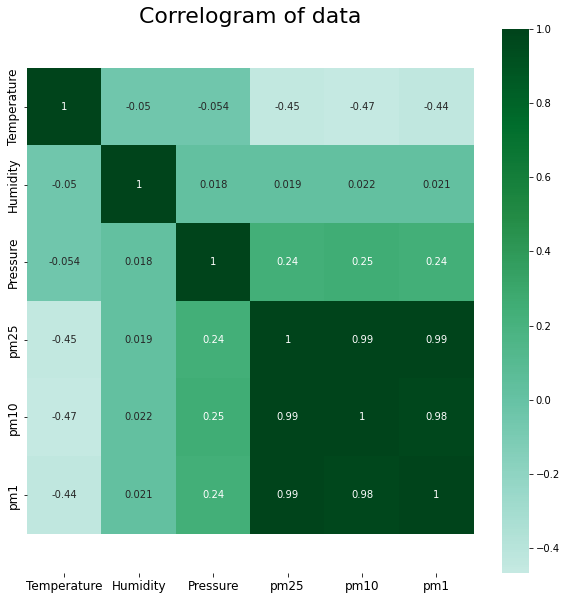

In [61]:
print_corelogram(year_melted,size=(10, 10))

Jeżeli chodzi o wskaźnik P10, który jest targetem jest on skorelowany w dużym stopniu ze wskaźnikami P25 oraz P1, dlatego, że są to wskaźniki zanieczyszczenia powietrza - więc są wzajemnie od siebie zależne. Jeżeli chodzi o pozostałe cechy to największa wartość korelacji jest dla temperatury. Istotne jest to, że jeżeli wartość temperatury rośnie/spada to wartość wskaźnika P10 zachowuje się odwrotnie. Zapewnw spowodowane jest to występowaniem w Krakowie dużego Smogu w miesiącach zimowych (niskie temperatury) głównie z przyczyny ogrzewania mieszkań za pomocą pieców na paliwa stałe a także spaliny samochodowe. W letnie miesiące (temperatuta wyższa), kiedy ogrzewanie mieszkań nie jest stosowane, smog jest zdecydowanie mniejszy.

Pozostałe czynniki takie jak ciścienie i wilgotność wykazują mniejszą korelację, jednak również wpływają na współczynnik zanieczyszczenia.



#Przygotowanie danych

In [62]:
dzielnica_I


,s_I_temperature,s_I_humidity,s_I_pressure,s_I_pm1,s_I_pm25,s_I_pm10
UTC time,,,,,,
2017-03-01 00:00:00,9.600000,53.800000,99839.788889,6.600000,0.800000,7.800000
2017-03-01 01:00:00,9.800000,54.000000,99824.716667,4.400000,0.000000,4.600000
2017-03-01 02:00:00,8.200000,70.000000,99883.388889,5.800000,0.400000,6.800000
2017-03-01 03:00:00,5.600000,86.800000,100032.211111,6.800000,1.600000,8.400000
2017-03-01 04:00:00,4.800000,84.400000,100135.816667,4.800000,0.200000,5.400000
...,...,...,...,...,...,...
2017-12-24 20:00:00,6.404762,85.253659,101740.492683,10.624390,12.092683,20.536585
2017-12-24 21:00:00,5.695238,85.292683,101780.834146,10.039024,11.463415,18.970732
2017-12-24 22:00:00,5.680952,82.712195,101790.019512,8.078049,9.287805,15.795122


In [63]:
dzielnica_I.describe()

,s_I_temperature,s_I_humidity,s_I_pressure,s_I_pm1,s_I_pm25,s_I_pm10
count,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,11.251222,77.801164,101656.437603,23.588770,22.900310,37.114954
std,7.539747,16.809131,665.596598,17.015129,18.828124,27.419324
min,-6.200000,21.600000,98398.800000,0.000000,0.000000,0.600000
25%,5.000000,66.511111,101292.794595,12.600000,10.800000,17.800000
50%,10.800000,83.400000,101690.610811,20.200000,18.200000,30.400000
75%,16.600000,91.600000,102101.103226,29.000000,28.600000,48.000000
max,34.400000,110.333333,103182.200000,146.200000,158.400000,216.200000


In [64]:
dzielnica_I.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7177 entries, 2017-03-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   s_I_temperature  7177 non-null   float64
 1   s_I_humidity     7177 non-null   float64
 2   s_I_pressure     7177 non-null   float64
 3   s_I_pm1          7177 non-null   float64
 4   s_I_pm25         7177 non-null   float64
 5   s_I_pm10         7177 non-null   float64
dtypes: float64(6)
memory usage: 650.5 KB


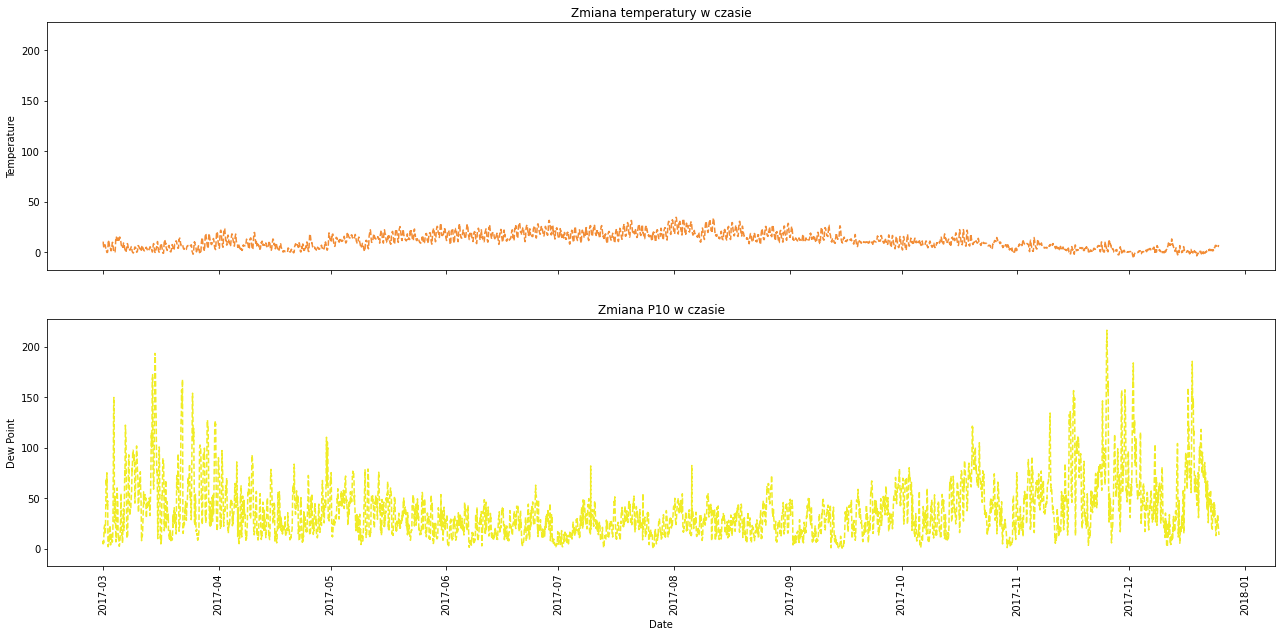

In [65]:
fig, ax = plt.subplots(2,1,sharey=True, figsize=(22,10))
# w funkcji subplots określamy, że ma dkładać się z dwóch wykresów, położonych jeden pod drugim, 
#ponieważ wykres ax tworzony jest jak macież możemy się odwoływać do piwrszej lub drugiej części ax[0] i ax[1]

#Pierwszy wykres
ax[0].plot(dzielnica_I.index,dzielnica_I['s_I_temperature'], color='#F28C35', linestyle='--')

#Drugi wykres
ax[1].plot(dzielnica_I.index,dzielnica_I['s_I_pm10'], color='#F0EC25',linestyle='--')


#edytujemy osie, opisy i tutuł
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Temperature')
ax[1].set_ylabel('Dew Point')
ax[0].set_title('Zmiana temperatury w czasie')
ax[1].set_title('Zmiana P10 w czasie')
ax[0].set_xticklabels([])
ax[1].xaxis.set_tick_params(rotation=90)

plt.show()

Sprawdźmy teraz jak wygląda rozkład czynnika PM10 dla interesującego nas okresu w przyszłości czerwiec - sierpień:

 - 1 czerwca jest 92 dniem w zbiorze danych
 - 31 sierpnia to 184 dzień w zbiorze

In [66]:
print(92*24)
print(184*24)

2208
4416


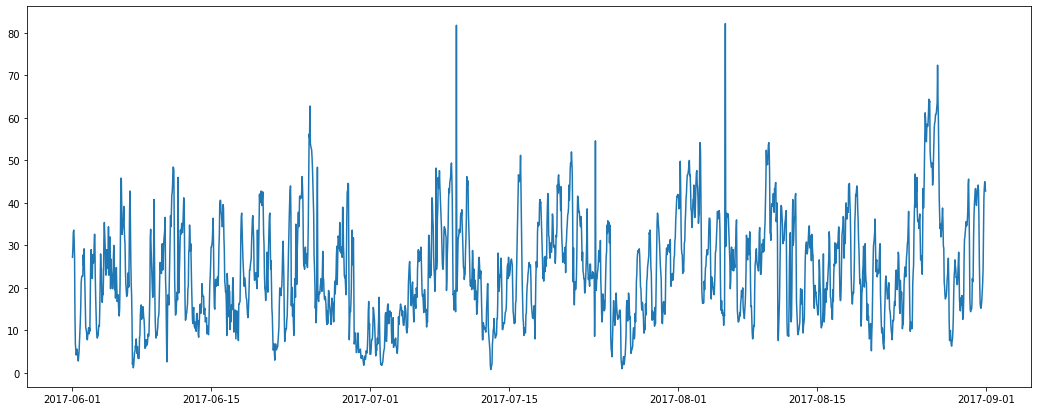

In [67]:
fig = plt.figure(figsize = (18,7))
plt.plot(dzielnica_I['s_I_pm10'].iloc[2208:4416])
plt.show()

Zbiór dzielimy na:
train -5000
val - 600
test - 1577

In [68]:
#Zamiana dataframe na macierz
dzielnica_I_array = dzielnica_I.to_numpy()

In [69]:
#Obliczenie macierzy z wartościami średnimi oraz odchyleniem standardowym
mean = dzielnica_I_array[:5000].mean(axis=0)
std = dzielnica_I_array[:5000].std(axis=0)

In [70]:
dzielnica_I.mean()

s_I_temperature        11.251222
s_I_humidity           77.801164
s_I_pressure       101656.437603
s_I_pm1                23.588770
s_I_pm25               22.900310
s_I_pm10               37.114954
dtype: float64

In [71]:
dzielnica_I.std()

s_I_temperature      7.539747
s_I_humidity        16.809131
s_I_pressure       665.596598
s_I_pm1             17.015129
s_I_pm25            18.828124
s_I_pm10            27.419324
dtype: float64

In [72]:
# Standaryzacja danych
dzielnica_I_array = (dzielnica_I_array-mean)/std

In [73]:
20*24

480

In [74]:
lookback = 480  #liczba kroków czasu, do których powinny sięgać dane wejściowe
step = 24 #przedział czasu określający częstotliwość próbkowania danych
delay = 144 # liczba kroków czasu określających przyszły wskaźnik PM10
batch_size=128 #liczba próbek wchodzących w skład wsadu

#Podział zbioru na treningowy, val i test

In [75]:
train_gen = generator(data=dzielnica_I_array, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=5000, 
                      shuffle=False, 
                      batch_size=batch_size, 
                      step=step)

val_gen = generator(data=dzielnica_I_array, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=5001, 
                      max_index=5600, 
                      shuffle=False, 
                      batch_size=batch_size, 
                      step=step)

test_gen = generator(data=dzielnica_I_array, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=5601, 
                      max_index=None, 
                      shuffle=False, 
                      batch_size=batch_size, 
                      step=step)

# // - dzielenie bez reszty

val_steps = (5600 - 5001 - lookback)//batch_size
test_steps = (len(dzielnica_I_array) - 5601 - lookback)//batch_size